## Import Libraries

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm
from matplotlib.animation import FuncAnimation

## Funtion to get image plot for scalar field visualization

- This function uses the local min/max values for mapping unless specified

In [2]:
cmap = 'viridis'

def show_image(fn, m=None, M=None):
    # Load the dataset
    dataset = nc.Dataset(fn + ".nc")

    # Extract the data variable
    data = dataset.variables["rain_rate"][0, :, :]
    data = data[:-1, :-1]
    # Extract latitudes and longitudes
    lats = dataset.variables["lat"][:]
    lats = lats[:-1]
    lons = dataset.variables["lon"][:]
    lons = lons[:-1]

    # Create a meshgrid for the latitudes and longitudes
    lon, lat = np.meshgrid(lons, lats)

    # Close the dataset
    dataset.close()

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(16, 8))

    # Plot the data using pcolormesh with the normalized data
    if m==None or M==None:
        pcm = ax.pcolormesh(data, shading='flat', cmap=cmap, vmin=data.min(), vmax=data.max())
    else:
        pcm = ax.pcolormesh(data, shading='flat', cmap=cmap, vmin=m, vmax=M)

    # Add a colorbar"
    cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Data Values')

    # Add labels and a title
    ax.set_aspect('auto')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Colormap Plot of AMSR2 Ocean Data', fontdict={'fontweight': 'bold', 'fontsize': 16})
    # ax.grid(which="both", visible=True)
    return plt.imshow(data, cmap =clr, vmin = 0, vmax = 1, extent =[-180, 180, -90, 90], origin ='lower', interpolation="nearest", aspect='auto'), fig, ax

In [3]:
# show_image("10")

## Determining the global max/min values

### Function to read a data file

In [4]:
import pandas as pd

def get_data(fn):
    # Load the dataset
    dataset = nc.Dataset("./data/" + fn + ".nc")

    # Extract the data variable
    data = dataset.variables["rain_rate"][0, :, :]
    data = data[:-1, :-1]

    # Handling Bad Values.
    # data[data < 0] = np.nan
    arr = pd.DataFrame(np.array(data))
    arr.replace(-999, np.nan, inplace=True)
    data = arr

    # Close the dataset
    dataset.close()
    return data


### Finding the min/max values

In [5]:
datasets = ["may-02", "may-12", "may-22", "june-02", "june-12", "june-22", "july-02", "july-12", "july-20", "july-30"]
# m = 0
# M = 0
# for d in datasets:
#     data = get_data(d)
#     for e in data:
#         for ee in e:
#             m = min(m, ee)
#             M = max(M, ee)

# m, M

# import pandas as pd
# dataset = nc.Dataset("./data/july-02.nc")
# data = dataset.variables['rain_rate'][0, :, :]
# data = data[:, :]
# data[data < -999] = np.nan
# arr = pd.DataFrame(np.array(data))
# arr.replace(-999, np.nan, inplace=True)
# x = arr.max()
# x.max()


In [6]:
# Saving the approx global min/max values, as the above cell takes a releatively long time to run to run
m, M = 0, 25.0

## Function to Save a GIF animation
- Also saves individual timesteps in the `./images/{strategy}/{datasets[frame]}.png` directory.

In [14]:
def save_animation(strategy, datasets):
    strategy = strategy # discrete, continuous, log

    data = get_data(datasets[0])
    # im, fig, ax = show_image("01", m, M)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(16, 8))

    pcm = None
    cbar = None
    norm = None
    cmap = 'viridis'
    if strategy == "continuous":
        pcm = ax.pcolormesh(data, shading='flat', cmap=cmap, vmin=m, vmax=M)
        norm = colors.Normalize(vmin=0, vmax=2.0)
        cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Data Values')
    elif strategy == "discrete":
        # Defining a discrete color map (extension to the Viridis color map)
        cmap = colors.ListedColormap(["#440154", "#482475", "#414487", '#355f8d', '#2a788e', '#21918c', '#22a884', '#44bf70', '#7ad151', '#bddf26', '#fde725', 'red'])
        bounds = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
        norm = colors.BoundaryNorm(bounds, cmap.N, extend='both')

        pcm = ax.pcolormesh(data, shading='flat', cmap=cmap, norm=norm)
        cbar = plt.colorbar(ax.pcolormesh(data, norm=norm, cmap=cmap),
                    ax=ax, orientation='vertical',
                    label="Data Values (Normalized)")
    elif strategy == "log":
        norm = colors.LogNorm(vmin=0.0001, vmax=25, clip=True)
        pcm = ax.pcolormesh(data, shading='flat', cmap=cmap, norm=norm)
        cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', label='Data Values')
    else:
        print("Unknown Strategy!")
        return

    # Add labels and a title
    ax.set_aspect('auto')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Colormap Plot of AMSR2 Ocean Data', fontdict={'fontweight': 'bold', 'fontsize': 16})

    im = plt.imshow(data, cmap=cmap, norm=norm, extent =[-180, 180, -90, 90], origin ='lower', interpolation="nearest", aspect='auto')

    def update(frame):
        # Update the data for the imshow plot with new values
        im.set_data(get_data(datasets[frame]))
        plt.savefig(f"./images/{strategy}/{datasets[frame]}.png")
        return im

    anim = FuncAnimation(fig, update, frames=len(datasets), repeat=False, interval=len(datasets)*50)
    anim.save(f"viridis_{strategy}.gif", fps=2, dpi=100)


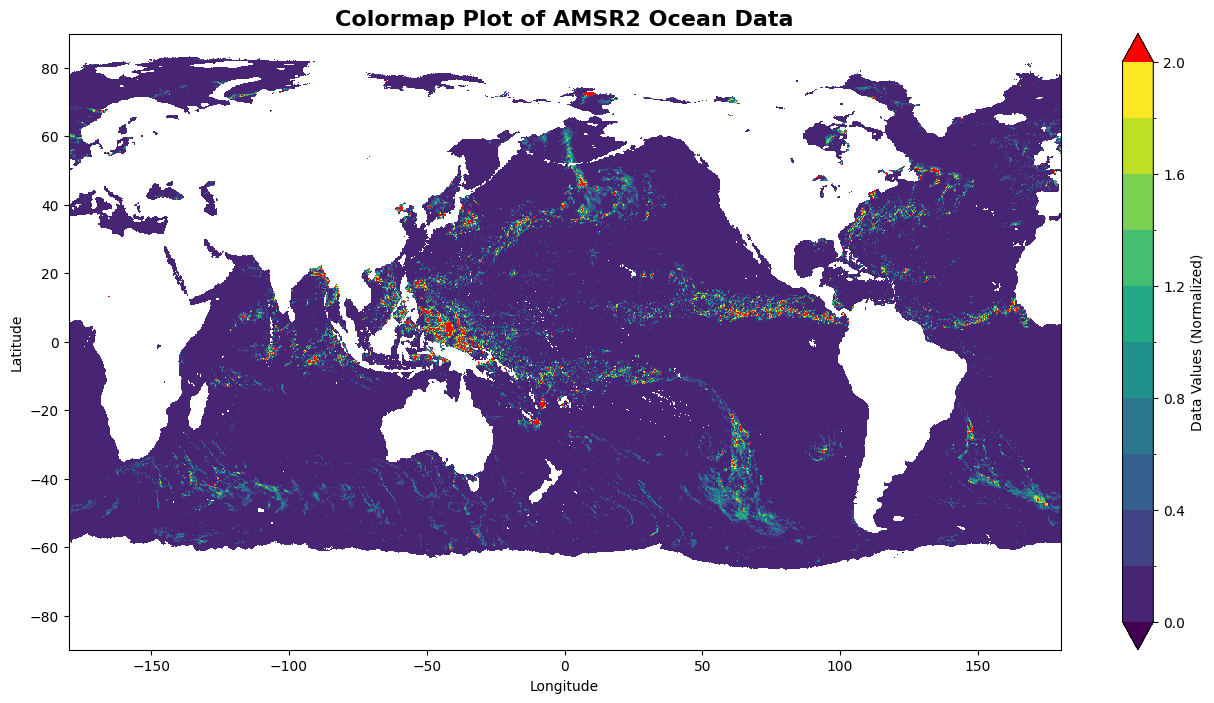

In [10]:
save_animation(strategy="discrete", datasets=datasets)

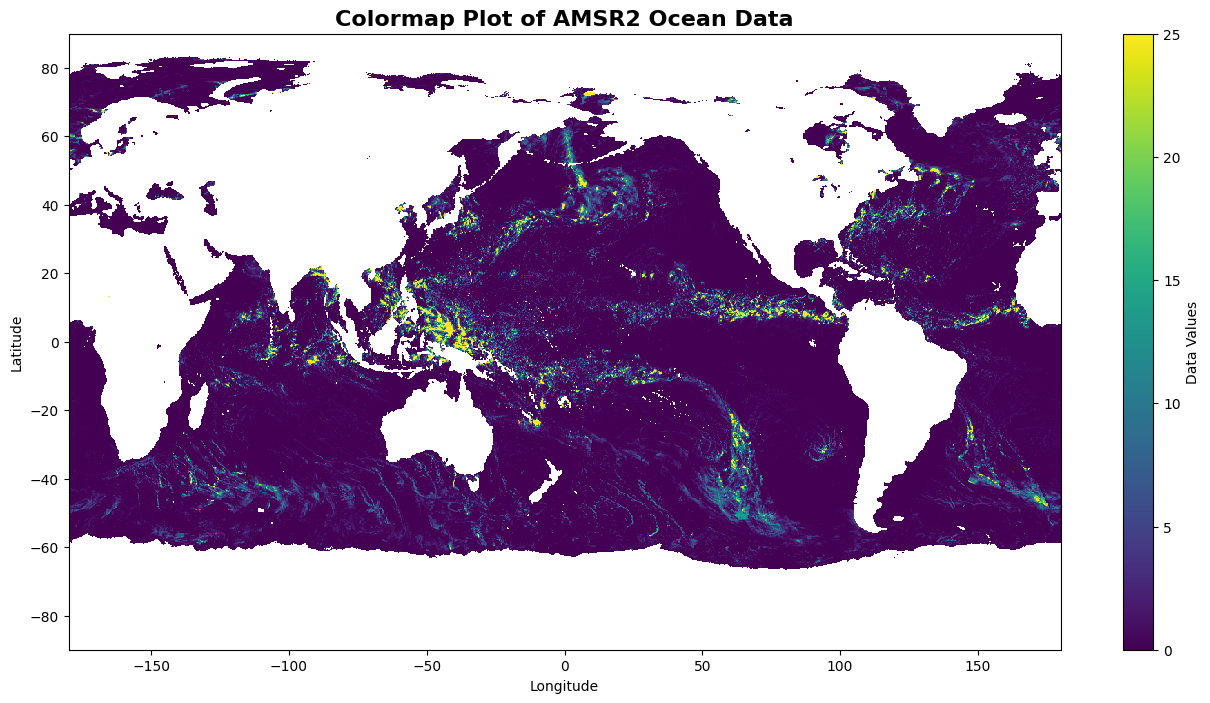

In [15]:
save_animation(strategy="continuous", datasets=datasets)

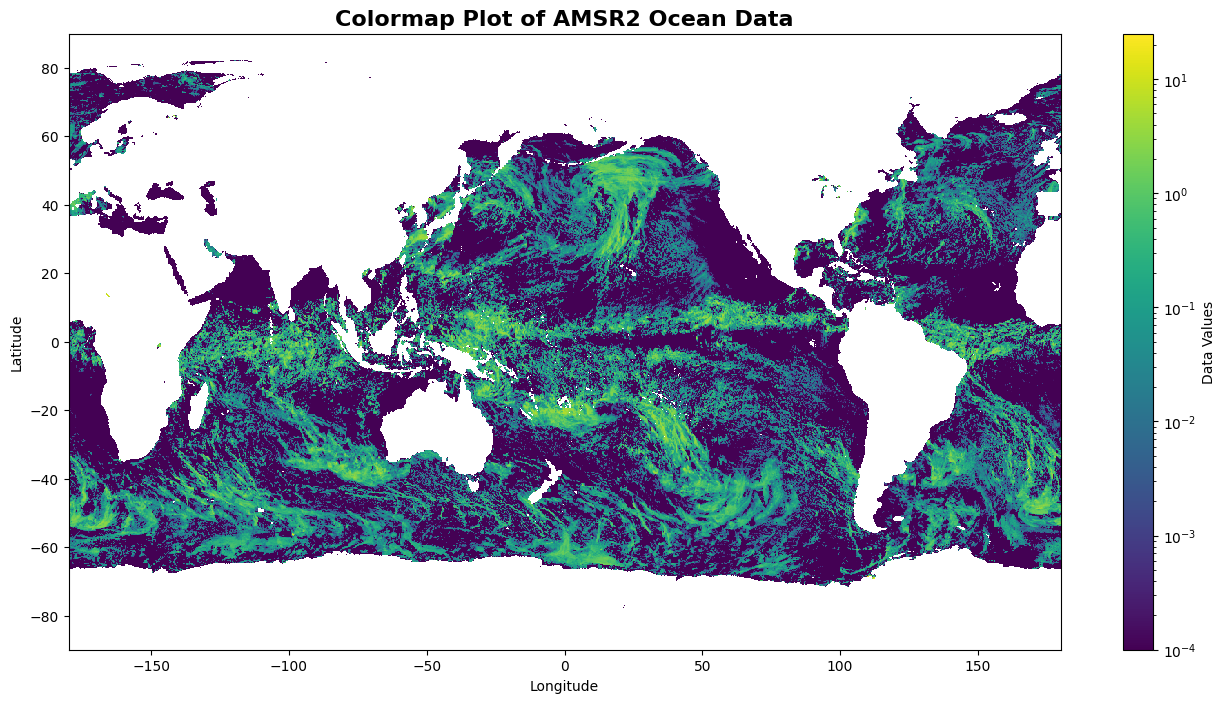

In [109]:
save_animation(strategy="log", datasets=datasets)